## Notebook for playing with Forman-Ricci curvature

Used papers:
- https://www.mdpi.com/2075-1680/5/4/26
- https://arxiv.org/pdf/1811.07825.pdf


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
nx.__version__

'2.5'

Documentation can be found here
https://networkx.org/documentation/stable/

Replicate seventh graph from [FIG.1](https://arxiv.org/pdf/1811.07825.pdf). Expected Ric(3, 4) is -4

In [3]:
def show_graph(gr, attr='weight'):
    pos = nx.drawing.layout.kamada_kawai_layout(gr)
    nx.draw(gr, pos, with_labels=True)
    elabels = nx.get_edge_attributes(gr, attr)
    # convert floats to a readable looking format
    elabels = {(v1, v2): str(round(val, 5)) for (v1, v2), val in elabels.items()} 
    nx.draw_networkx_edge_labels(gr, pos, 
                                 edge_labels=elabels)
    plt.show()

In [4]:
adj = [
    (0, 3), (1, 3), (2, 3),
    (3, 4),
    (4, 5), (4, 6), (4, 7)
]

In [10]:
G = nx.Graph()
G.add_nodes_from(range(8))
G.add_edges_from(adj)
for e in G.edges:
    G.edges[e]['weight'] = 1
for v in G.nodes:
    G.nodes[v]['weight'] = 1

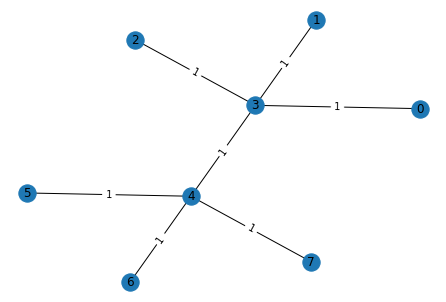

In [11]:
show_graph(G, 'weight')

In [12]:
# get node weight
G.nodes[0]['weight']
# get edge weight
G.edges[0, 3]['weight']

1

In [13]:
# get neighbors
list(G.neighbors(1))

[3]

In [14]:
def forman(gr, edge):
    v1, v2 = edge
    # important weights
    we = gr.edges[edge]['weight']
    wv1 = gr.nodes[v1]['weight']
    wv2 = gr.nodes[v2]['weight']
    
    f = (wv1 + wv2) / we
    for ev1 in gr.neighbors(v1):
        if ev1 != v2:
            f -= wv1 / np.sqrt(we * gr.edges[v1, ev1]['weight'])
    for ev2 in gr.neighbors(v2):
        if ev2 != v1:
            f -= wv2 / np.sqrt(we * gr.edges[v2, ev2]['weight'])

    f *= we
    return f

In [15]:
for e in G.edges():
    G.edges[e]['forman'] = forman(G, e)

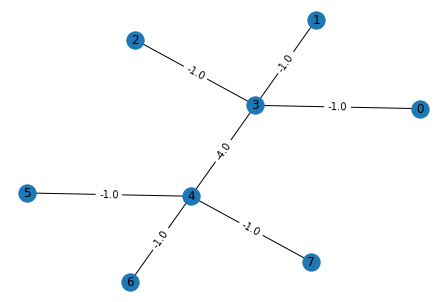

In [16]:
show_graph(G, 'forman')

It really is -4!